Archivo utilizado para procesar la base de datos con la que trabajaremos

Importamos librerias

In [1]:
import pandas as pd
import numpy as np

Importamos Datos Privados

In [47]:
# Levanto la base de datos privados con la que trabajeremos
df_k = pd.read_csv('base_kavak.csv', sep=";")

# Observamos nuestro dataset
df_k.info()
df_k.shape
# (2532, 15)

# Armo una lista de los modelos disponibles en el dataset
modelos = df_k['Modelo'].unique().tolist()
# 146 modelos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2446 non-null   int64  
 1   price                2446 non-null   int64  
 2   currency             2446 non-null   object 
 3   condition            2446 non-null   object 
 4   Marca                2446 non-null   object 
 5   Puertas              2446 non-null   int64  
 6   Tipo de combustible  2446 non-null   object 
 7   Kilómetros           2238 non-null   float64
 8   Modelo               2446 non-null   object 
 9   Versión              2446 non-null   object 
 10  Año                  2446 non-null   int64  
 11  adressstate_name     2446 non-null   object 
 12  adresscity_name      2446 non-null   object 
 13  Motor                2446 non-null   float64
 14  Transmisión          2446 non-null   object 
dtypes: float64(2), int64(4), object(9)
mem

Importamos Datos Públicos

In [2]:
# Levanto la base de datos públicos con la que trabajeremos
df_0 = pd.read_excel('data_api.xlsx')

In [3]:
# Observamos nuestro dataset
df_0.info()
df_0.shape
# (72890, 46)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72890 entries, 0 to 72889
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     72890 non-null  object 
 1   site_id                72890 non-null  object 
 2   title                  72890 non-null  object 
 3   price                  72890 non-null  float64
 4   currency_id            72890 non-null  object 
 5   available_quantity     72890 non-null  int64  
 6   sold_quantity          72890 non-null  int64  
 7   buying_mode            72890 non-null  object 
 8   listing_type_id        72890 non-null  object 
 9   condition              72890 non-null  object 
 10  thumbnail_id           72862 non-null  object 
 11  official_store_id      7389 non-null   float64
 12  catalog_product_id     62859 non-null  object 
 13  tags                   72890 non-null  object 
 14  order_backend          72890 non-null  int64  
 15  us

(72890, 46)

In [4]:
# Evaluamos si tiene duplicados
print(df_0.duplicated().sum())
# 0 filas duplicadas

0


In [5]:
# Evaluamos si tiene nulos
df_0.isna().sum().sort_values()
# Varias variables tienen nulos

id                           0
Kilómetros                   0
Tipo de combustible          0
Puertas                      0
Marca                        0
Año                          0
adressstate_id               0
adressstate_name             0
Condición del ítem           0
use_thumbnail_id             0
order_backend                0
Modelo                       0
tags                         0
adresscity_name              0
condition                    0
listing_type_id              0
buying_mode                  0
sold_quantity                0
available_quantity           0
currency_id                  0
price                        0
title                        0
site_id                      0
Versión                      2
thumbnail_id                28
adresscity_id               53
Transmisión               4584
Motor                     5269
Control de tracción       7154
catalog_product_id       10031
Capacidad de personas    12019
Largo                    12523
Cilindra

In [6]:
df_1 = df_0.drop(labels=['Horas de uso', 'adressarea_code','adressphone1','Cilindros','Línea', 'official_store_id','site_id','title',
'sold_quantity','buying_mode','use_thumbnail_id','Condición del ítem','adressstate_id','adresscity_id','adressarea_code',
'adressphone1','thumbnail_id', 'Combustible', 'Marca del motor', 'Capacidad de carga', 'Peso'], axis=1)
df_1.isna().sum().sort_values()

# Otras variables ya borradas
# ['Power trim' 'stop_time' 'permalink' 'thumbnail' 'accepts_mercadopago'\n 'address' 'seller_address' 'attributes' 'category_id' 'domain_id'] not found in axis"


id                           0
adresscity_name              0
adressstate_name             0
Año                          0
Modelo                       0
Kilómetros                   0
Tipo de combustible          0
Marca                        0
Puertas                      0
listing_type_id              0
tags                         0
condition                    0
order_backend                0
available_quantity           0
currency_id                  0
price                        0
Versión                      2
Transmisión               4584
Motor                     5269
Control de tracción       7154
catalog_product_id       10031
Capacidad de personas    12019
Largo                    12523
Cilindrada               13810
Potencia                 13817
Aire acondicionado       36116
Único dueño              56374
dtype: int64

In [9]:
# Sacamos aquellas publicadas con valor en Dolares
df_1 = df_1.drop(df_1[df_1['currency_id']=='USD'].index)
df_1.shape
# (62436, 27)
#  10454 fila eliminadas

(62436, 27)

In [10]:
df_1 = df_1.drop(df_1[df_1['condition']=='new'].index)
df_1.shape
# (49474, 27)
# 12962 filas eliminadas

(49474, 27)

In [11]:
df_1.info()
df_1.describe()
df_1.shape
# (49474, 27)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49474 entries, 0 to 72889
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     49474 non-null  object 
 1   price                  49474 non-null  float64
 2   currency_id            49474 non-null  object 
 3   available_quantity     49474 non-null  int64  
 4   listing_type_id        49474 non-null  object 
 5   condition              49474 non-null  object 
 6   catalog_product_id     45385 non-null  object 
 7   tags                   49474 non-null  object 
 8   order_backend          49474 non-null  int64  
 9   Único dueño            8364 non-null   object 
 10  Control de tracción    44503 non-null  object 
 11  Aire acondicionado     21823 non-null  object 
 12  Marca                  49474 non-null  object 
 13  Puertas                49474 non-null  int64  
 14  Motor                  46252 non-null  object 
 15  Ti

(49474, 27)

In [12]:
# Saco los valores de MLA para tener valores númericos
df_1 = df_1.replace('MLA','',regex=True)

# Pongo a los kilometros en el formato correcto
df_1 = df_1.replace(' km','',regex=True)
df_1

,id,price,currency_id,available_quantity,listing_type_id,condition,catalog_product_id,tags,order_backend,Único dueño,...,Modelo,Transmisión,Versión,Año,adressstate_name,adresscity_name,Cilindrada,Largo,Capacidad de personas,Potencia
0,1133956632,1100000.0,ARS,1,free,used,NaN,"['good_quality_thumbnail', 'dragged_visits', '...",1,No,...,Legend,Automática,AT V6 3.2L Sedan 4 puertas,1998,Santa Fe,General López,NaN,NaN,NaN,NaN
1,932476572,4000000.0,ARS,1,silver,used,NaN,"['good_quality_picture', 'good_quality_thumbna...",1,Sí,...,AM 150 CD,Manual,Utilitario,2009,Buenos Aires Interior,Lincoln,NaN,NaN,NaN,NaN
2,1121119730,3700000.0,ARS,1,gold_premium,used,8687637,"['good_quality_picture', 'good_quality_thumbna...",1,No,...,Giulietta,Automática,1.4 Distinctive 170cv At,2016,Capital Federal,Capital Federal,1368 cc,4351 mm,5.0,170 hp
3,1127687379,2940000.0,ARS,1,gold_premium,used,8689183,"['dragged_visits', 'good_quality_picture', 'go...",2,No,...,Mito,Automática,1.4 Tbi Quadrifoglio Verde,2012,Bs.As. G.B.A. Oeste,Moreno,1368 cc,4065 mm,5.0,170 hp
4,1136612801,2880000.0,ARS,1,gold_premium,used,8713794,"['good_quality_picture', 'good_quality_thumbna...",3,NaN,...,Mito,Manual,1.4 Junior 78cv,2017,Capital Federal,Capital Federal,1368 cc,4065 mm,5.0,78 hp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72866,1133844662,1500000.0,ARS,1,free,used,8699127,"['dragged_visits', 'good_quality_picture', 'go...",27,Sí,...,C30,Manual,Pack Plus,2010,Capital Federal,Capital Federal,NaN,NaN,NaN,NaN
72868,1131200958,600000.0,ARS,1,free,used,NaN,"['good_quality_thumbnail', 'dragged_visits', '...",1,Sí,...,LZW,Manual,1010 vhw fu,1999,Bs.As. G.B.A. Norte,General San Martín,NaN,NaN,NaN,NaN
72887,1135140880,850000.0,ARS,1,free,used,NaN,"['good_quality_picture', 'good_quality_thumbna...",19,Sí,...,Zmax 200 Truck,Manual,Tres ruedas.,2018,Bs.As. G.B.A. Oeste,Hurlingham,NaN,NaN,NaN,NaN
72888,1133812225,340000.0,ARS,1,free,used,NaN,"['dragged_visits', 'good_quality_picture', 'go...",20,Sí,...,Patagonia Eagle,NaN,Moto Chopper 250 CC,2011,Bs.As. G.B.A. Norte,Malvinas Argentinas,NaN,NaN,NaN,NaN


In [34]:
df_2 = df_1.drop(labels=['tags','order_backend','catalog_product_id','available_quantity',
'Único dueño','Control de tracción', 'Aire acondicionado', 'Cilindrada', 'Largo', 'Capacidad de personas', 'Potencia','listing_type_id'], axis=1)

In [35]:
# Sacamos publicaciones > 999.999 kn
df_2['Kilómetros'] = df_2['Kilómetros'].astype(int)


df_2 = df_2.drop(df_2[df_2['Kilómetros']>999999].index)
df_2.shape
# (49474, 27)
# 42 filas eliminadas

(49432, 15)

In [40]:
# Sacamos publicaciones > 999.999 kn
df_2['Año'] = df_2['Año'].astype(int)


df_2 = df_2.drop(df_2[df_2['Año']<1990].index)
df_2.shape
# (49058, 15)
# 416 filas eliminadas


(49058, 15)

In [41]:
df_2.info()
df_2.describe()
df_2.shape
# (5684, 15)
# (49474, 15) --> Nuevo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49058 entries, 0 to 72888
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   49058 non-null  object 
 1   price                49058 non-null  float64
 2   currency_id          49058 non-null  object 
 3   condition            49058 non-null  object 
 4   Marca                49058 non-null  object 
 5   Puertas              49058 non-null  int64  
 6   Motor                46125 non-null  object 
 7   Tipo de combustible  49058 non-null  object 
 8   Kilómetros           49058 non-null  int32  
 9   Modelo               49058 non-null  object 
 10  Transmisión          46432 non-null  object 
 11  Versión              49057 non-null  object 
 12  Año                  49058 non-null  int32  
 13  adressstate_name     49058 non-null  object 
 14  adresscity_name      49058 non-null  object 
dtypes: float64(1), int32(2), int64(1), o

(49058, 15)

Guardamos la info en un Excel

In [43]:
# Guardamos la información en un Excel

# Exporto a un Excel
datos_base_model_simple = df_2
datos_base_model_simple.to_excel('data_ready_to_model_api_simple.xlsx', index=False)

datos_base_model_completa = df_1
datos_base_model_completa.to_excel('data_ready_to_model_api_completa.xlsx', index=False)

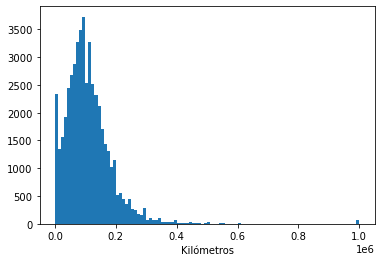

count     49432.000000
mean     111103.505968
std       80525.442529
min           1.000000
25%       60699.500000
50%       99000.000000
75%      145000.000000
max      999999.000000
Name: Kilómetros, dtype: float64

In [26]:
# Check nueva variable de Kilotmetros
 
import matplotlib.pyplot as plt

plt.title('')
plt.xlabel("Kilómetros")
plt.hist(df_2['Kilómetros'], bins = 100)
plt.show()

df_2['Kilómetros'].describe()

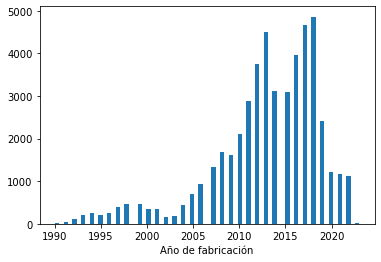

count    49058.000000
mean      2012.979718
std          5.848048
min       1990.000000
25%       2010.000000
50%       2014.000000
75%       2017.000000
max       2023.000000
Name: Año, dtype: float64

In [42]:
# Check nueva variable de Año
 
import matplotlib.pyplot as plt

plt.title('')
plt.xlabel('Año de fabricación')
plt.hist(df_2['Año'], bins = 70)
plt.show()

df_2['Año'].describe()